# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

#evaluation metrics->classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve #charts
from sklearn.metrics import precision_recall_curve#charts

#cross validation
from sklearn.model_selection import train_test_split

from sklearn import preprocessing   # imputing and scale
from sklearn.decomposition import PCA  #principal components Analysis
from sklearn.impute import KNNImputer   # missing values imputation
from pandas.plotting import scatter_matrix  #scatter matrix correlation , scatter

from sklearn.cluster import KMeans  # clustering
from sklearn.metrics import silhouette_score #evaluation metric for # of clusters

#all possible subsets
import itertools

#evaluation metrics for regression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error 

#processing data / standardization
from sklearn import preprocessing


import warnings
warnings.filterwarnings('ignore')

In [3]:
# Uploading wine file to be used in google colab doc.
from google.colab import files
import os

# Check if file is already uploaded.
# If not then upload the file from local files with the browse button.
if not os.path.isfile('wine.csv'):
    uploaded = files.upload()

Saving wine.csv to wine.csv


In [4]:
df = pd.read_csv('wine.csv')

# **Data Exploration**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6491 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6494 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6482 non-null   float64
 10  alcohol               6487 non-null   float64
 11  Type                  6497 non-null   object 
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6491.000000,6497.000000,6494.000000,6497.000000,6482.000000,6487.000000,6497.000000
mean,7.214586,0.339632,0.318649,5.443508,0.056031,30.535805,115.738941,0.994596,3.218662,0.531403,10.494394,5.818378
std,1.296304,0.164620,0.145325,4.758042,0.035032,17.756039,56.518925,0.002998,0.160795,0.148912,1.193098,0.873255
min,3.799620,0.079992,0.000000,0.600030,0.009000,1.000050,5.999700,0.987011,2.720136,0.219978,8.000800,3.000000
25%,6.399360,0.229977,0.250013,1.800090,0.037998,17.000850,76.996150,0.992241,3.110156,0.429957,9.500950,5.000000
50%,6.999300,0.289971,0.310016,3.000150,0.046998,29.001450,117.994100,0.994786,3.210161,0.509949,10.301030,6.000000
75%,7.699230,0.399960,0.390020,8.100405,0.064997,41.002050,155.992200,0.996890,3.320166,0.599940,11.301130,6.000000
max,15.898410,1.579842,1.660083,65.803290,0.610969,289.014450,439.978000,1.038876,4.010201,1.999800,14.901490,9.000000


In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Type,quality
0,7.39926,0.964904,0.000000,2.200110,0.087996,16.000800,31.99840,0.99746,3.580179,0.669933,10.20102,White,5
1,12.29877,0.389961,0.630032,2.300115,0.090995,6.000300,17.99910,1.00030,3.160158,0.489951,9.50095,White,5
2,6.39936,0.269973,0.490025,7.300365,0.045998,53.002650,205.98970,0.99550,3.240162,0.429957,9.20092,Red,6
3,7.39926,0.189981,0.300015,12.800640,0.052997,48.502425,228.98855,0.99850,3.140157,0.489951,9.10091,Red,7
4,6.19938,0.339966,0.300015,11.100555,0.046998,28.001400,236.98815,0.99800,3.180159,0.489951,8.70087,Red,5


In [8]:
for x in df.columns:
    print(df.groupby([x]).size())
    print('-'*50)

fixed acidity
3.79962     1
3.89961     1
4.19958     2
4.39956     3
4.49955     1
           ..
14.29857    1
14.99850    2
15.49845    2
15.59844    2
15.89841    1
Length: 106, dtype: int64
--------------------------------------------------
volatile acidity
0.079992    4
0.084992    1
0.089991    1
0.099990    6
0.104990    6
           ..
1.179882    1
1.184882    1
1.239876    1
1.329867    2
1.579842    1
Length: 187, dtype: int64
--------------------------------------------------
citric acid
0.000000    151
0.010001     40
0.020001     56
0.030002     32
0.040002     41
           ... 
0.910046      2
0.990050      1
1.000050      6
1.230062      1
1.660083      1
Length: 89, dtype: int64
--------------------------------------------------
residual sugar
0.600030      2
0.700035      7
0.800040     25
0.900045     41
0.950048      4
             ..
22.601130     1
23.501175     1
26.051303     2
31.601580     2
65.803290     1
Length: 316, dtype: int64
--------------------------

In [9]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.283013,-0.329056,0.458716,-0.252700,0.299563,-0.095747,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352854,-0.414472,0.270790,0.261454,0.226390,-0.037641,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133613,0.195236,0.096625,-0.329808,0.055500,-0.010057,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402737,0.495482,0.552955,-0.267320,-0.186291,-0.359353,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195384,-0.279628,0.362422,0.044708,0.396604,-0.257473,-0.200666
free sulfur dioxide,-0.283013,-0.352854,0.133613,0.402737,-0.195384,1.000000,0.720922,0.025389,-0.145902,-0.188776,-0.178757,0.055598
total sulfur dioxide,-0.329056,-0.414472,0.195236,0.495482,-0.279628,0.720922,1.000000,0.032774,-0.238414,-0.276230,-0.265466,-0.041388
density,0.458716,0.270790,0.096625,0.552955,0.362422,0.025389,0.032774,1.000000,0.011322,0.259999,-0.686525,-0.305477
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145902,-0.238414,0.011322,1.000000,0.192294,0.120925,0.019506
sulphates,0.299563,0.226390,0.055500,-0.186291,0.396604,-0.188776,-0.276230,0.259999,0.192294,1.000000,-0.002769,0.037728


In [10]:
df['Type'].value_counts()

Red      4898
White    1599
Name: Type, dtype: int64

In [11]:
df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

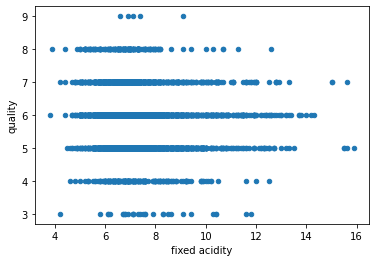

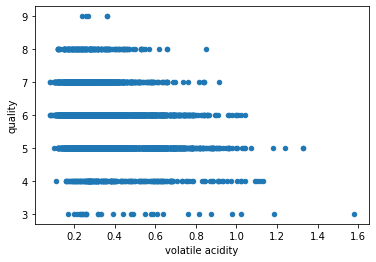

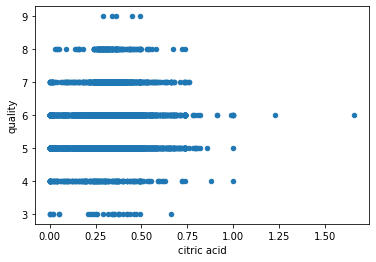

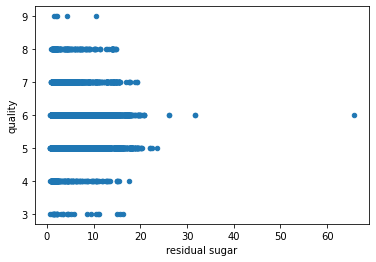

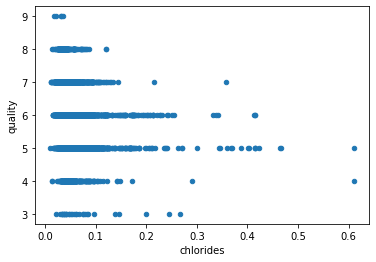

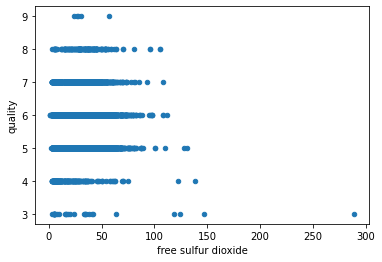

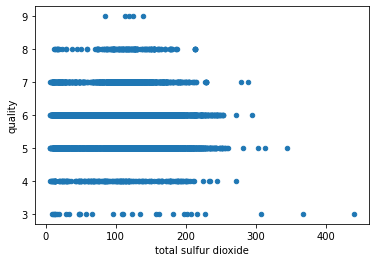

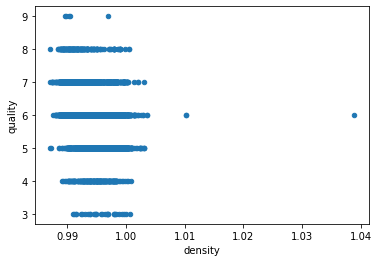

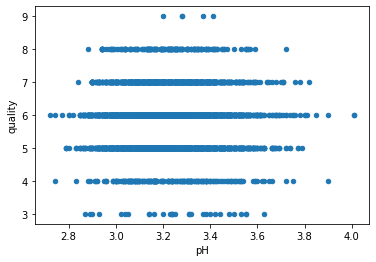

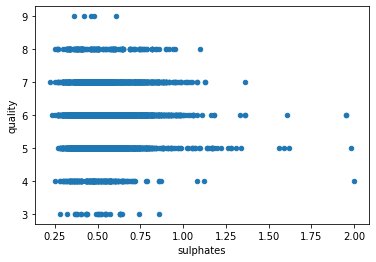

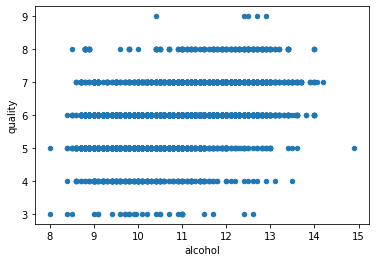

In [12]:
for x in df.columns[:11]:
    df.plot.scatter(x=x, y='quality')
    plt.show()

In [13]:
predictors = df.columns[:11]
targets = ['Type', 'quality']

for predictor in predictors:
    piv_table = df.pivot_table(values=predictor, columns=targets[1], aggfunc=np.mean)
    print(piv_table)
    print('-'*50)

quality               3        4         5         6         7        8  \
fixed acidity  7.852548  7.28816  7.326068  7.176539  7.128249  6.83455   

quality               9  
fixed acidity  7.419258  
--------------------------------------------------
quality                  3         4         5         6         7         8  \
volatile acidity  0.516948  0.457917  0.389575  0.313831  0.288771  0.290981   

quality                 9  
volatile acidity  0.29797  
--------------------------------------------------
quality             3         4         5         6         7         8  \
citric acid  0.281014  0.272329  0.307738  0.323599  0.334781  0.332556   

quality            9  
citric acid  0.38602  
--------------------------------------------------
quality                3         4         5         6         7         8  \
residual sugar  5.140257  4.153911  5.804406  5.550031  4.731933  5.383171   

quality                9  
residual sugar  4.120206  
-------------------

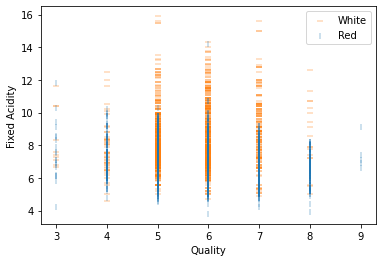

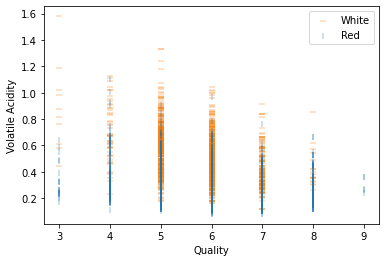

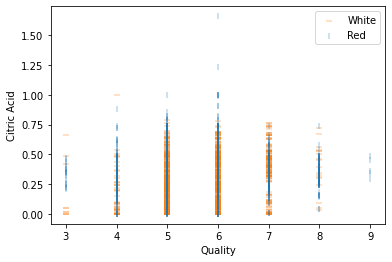

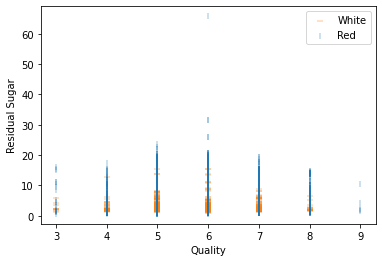

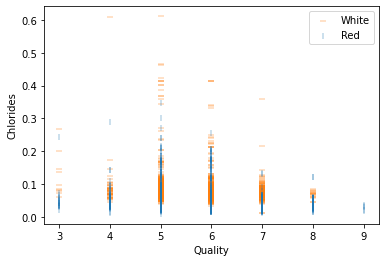

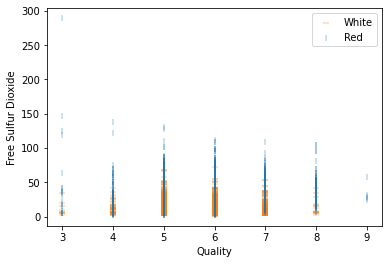

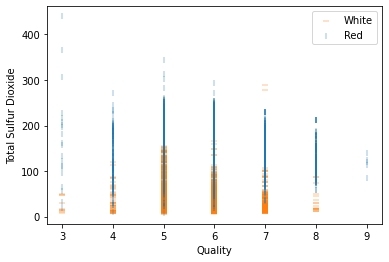

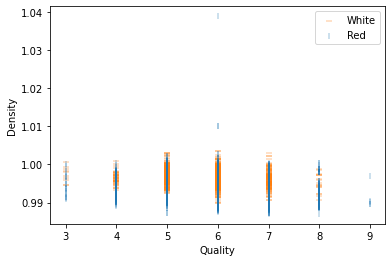

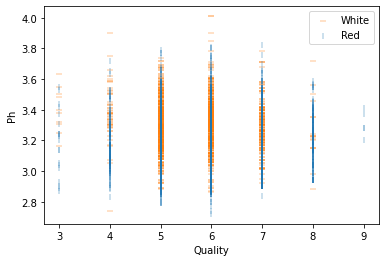

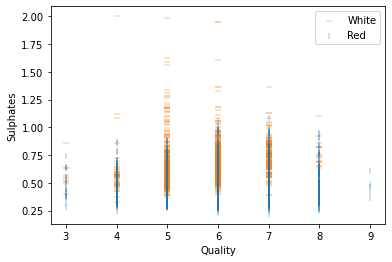

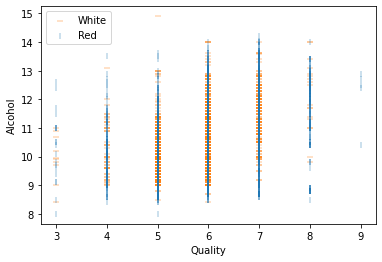

In [14]:
for x in df.columns[:11]:
    _, ax = plt.subplots() 

    # for catValue, color in ('White', 'C1'), ('Red', 'C0'):  
    subset_df = df[df.Type == 'White']  
    ax.scatter(subset_df.quality, subset_df[x], color='C1', edgecolor='none', marker='_', alpha=0.3, linewidths=2) 
    subset_df = df[df.Type == 'Red']  
    ax.scatter(subset_df.quality, subset_df[x], color='C0', edgecolor='none', marker='|', alpha=0.3) 
    ax.set_xlabel('Quality') 
    ax.set_ylabel(x.title()) 
    ax.legend(["White", "Red"]) 
    plt.show()

In [15]:
for i in range(3,10):
    print('Quality: ' + str(i))
    print(df.loc[df['quality'] == i]['Type'].value_counts())
    print('-'*50)

Quality: 3
Red      20
White    10
Name: Type, dtype: int64
--------------------------------------------------
Quality: 4
Red      163
White     53
Name: Type, dtype: int64
--------------------------------------------------
Quality: 5
Red      1457
White     681
Name: Type, dtype: int64
--------------------------------------------------
Quality: 6
Red      2198
White     638
Name: Type, dtype: int64
--------------------------------------------------
Quality: 7
Red      880
White    199
Name: Type, dtype: int64
--------------------------------------------------
Quality: 8
Red      175
White     18
Name: Type, dtype: int64
--------------------------------------------------
Quality: 9
Red    5
Name: Type, dtype: int64
--------------------------------------------------


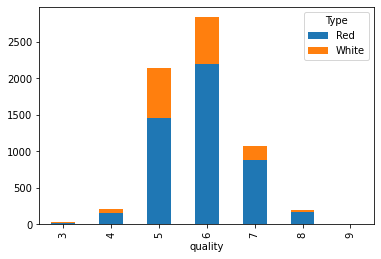

In [16]:
df.groupby(['quality','Type']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

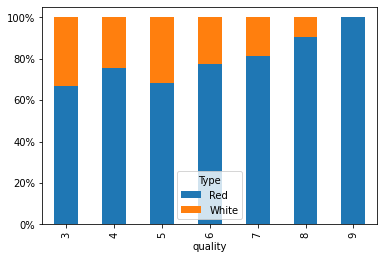

In [17]:
df.groupby(['quality','Type']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

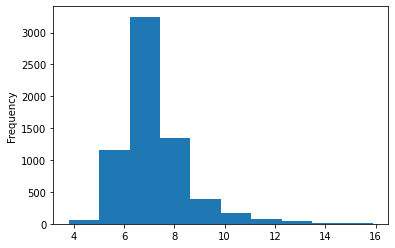

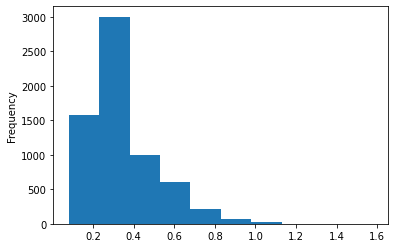

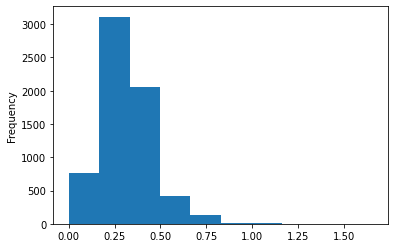

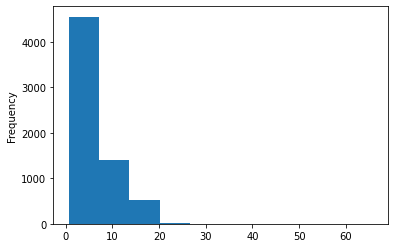

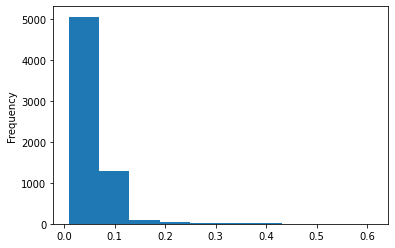

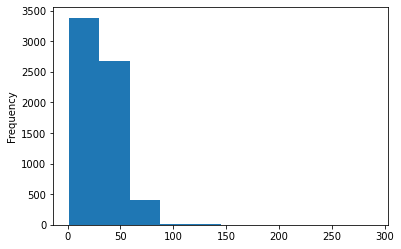

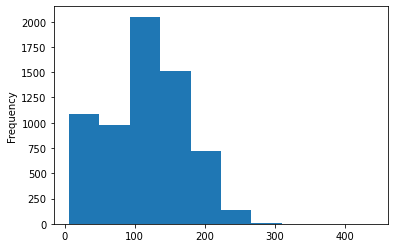

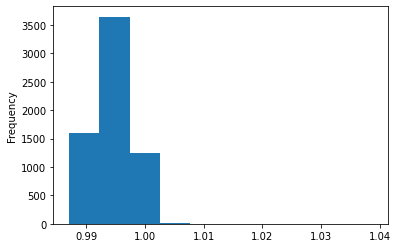

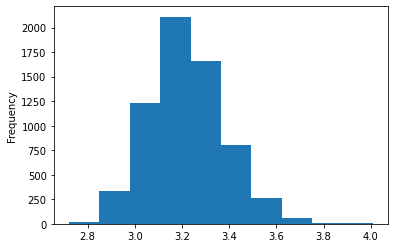

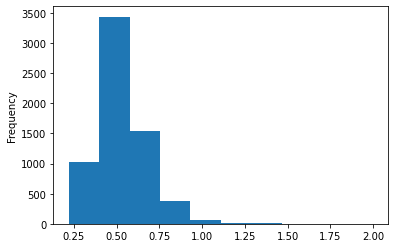

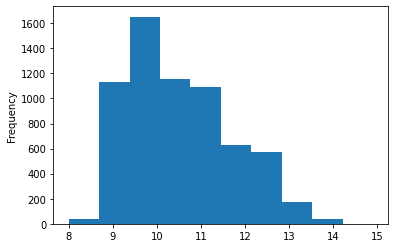

In [18]:
for col in df.columns[:11]:
    df[col].plot(kind='hist')
    plt.show()

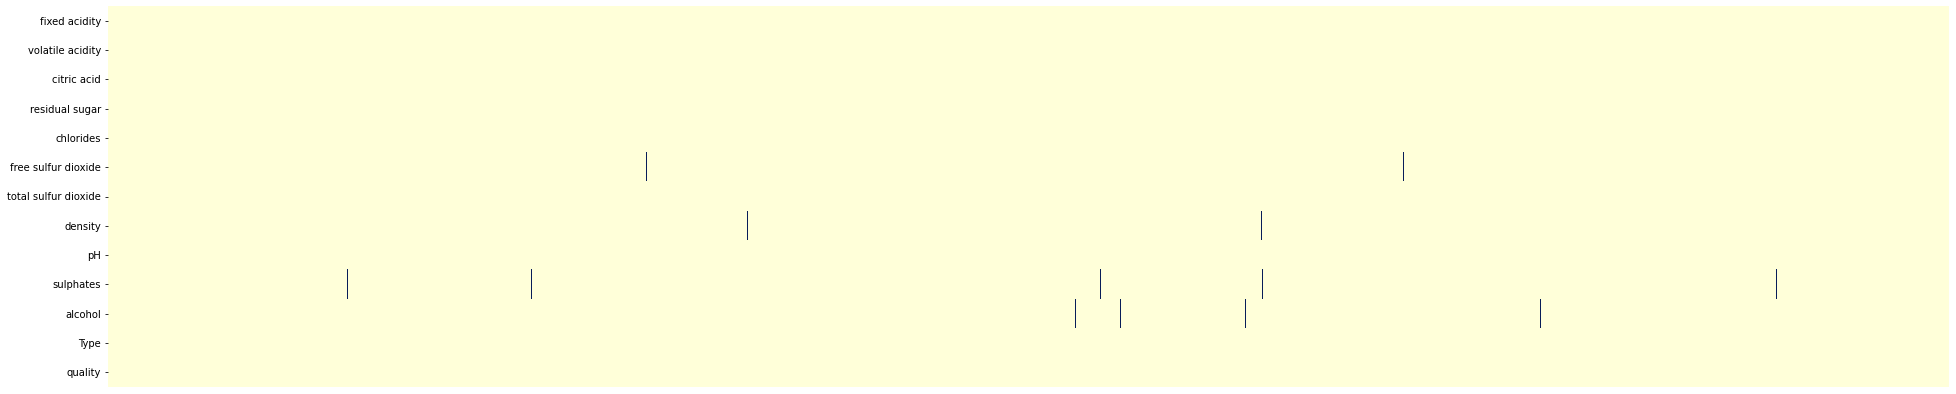

In [19]:
plt.figure(figsize=(33,7))
sns.heatmap(df.isnull().transpose(),
            cmap="YlGnBu", cbar=False, xticklabels=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f94929d0280>,
      dtype=object)

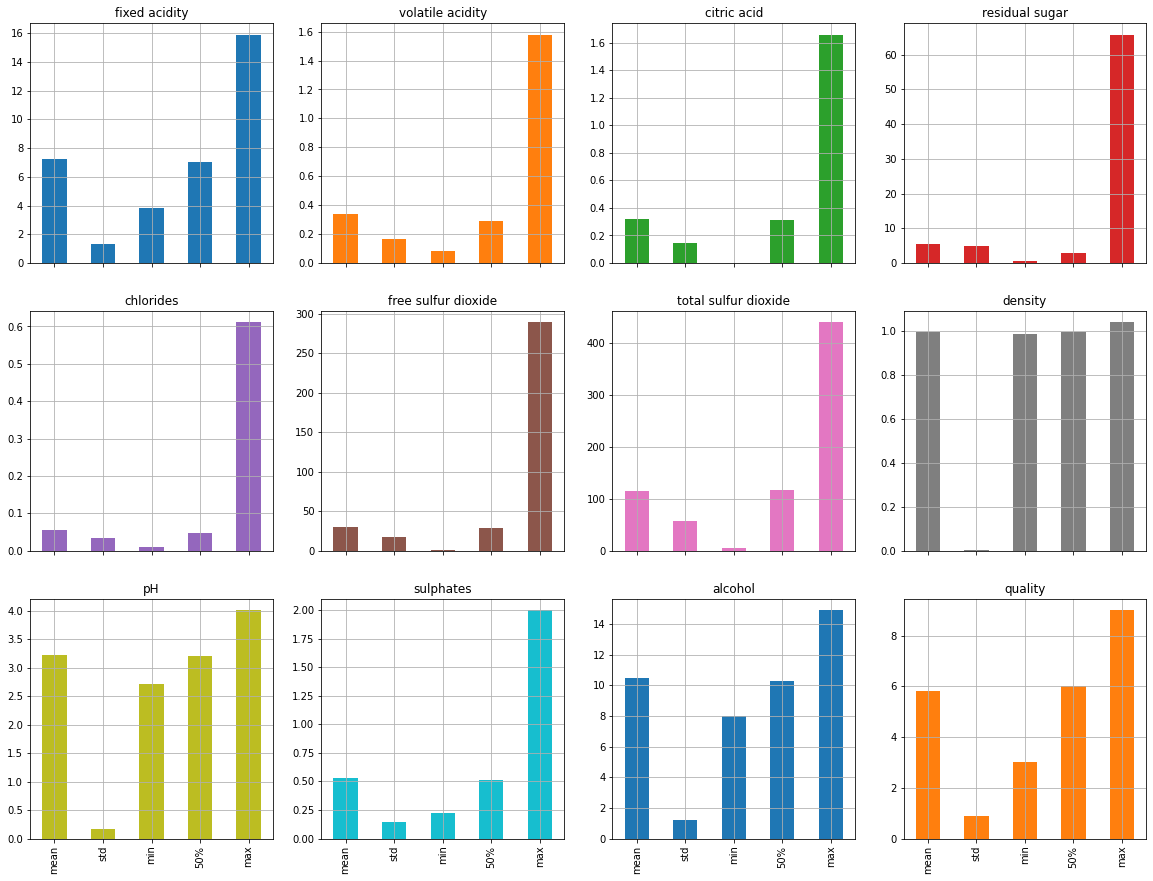

In [20]:
df.describe(percentiles=[0.5])[1:].plot(kind='bar', subplots=True, sharey=False, layout=(3,4), figsize=(20,15), legend=False, grid=True)

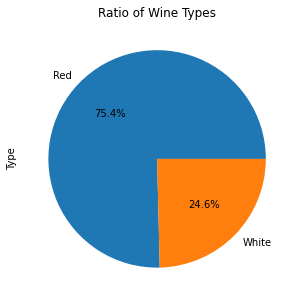

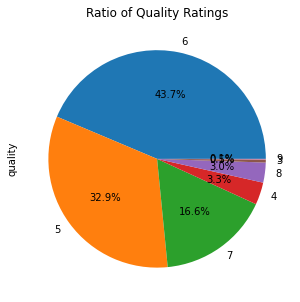

In [21]:
df['Type'].value_counts().plot(kind='pie', autopct='%.1f%%', title='Ratio of Wine Types', figsize=(5,5))
plt.show()

df['quality'].value_counts().plot(kind='pie', autopct='%.1f%%', title='Ratio of Quality Ratings', figsize=(5,5))
plt.show()

# **Data Preparation**

In [22]:
### Things to do (+ means done, - means need to do.):
# + Impute missing data
# + Create dummy/flag variable to track what was changed
# + Create dummy variable for wine type
# + Split data into Validation/Test with 70/30 split

In [23]:
# Creating a dummy variable to track which rows have data that need to be imputed.
df['Imputed'] = np.where(df.isnull().any(axis=1)==True, 1, 0)

# Storing all rows that have missing data.
missing_data = df[df.isnull().any(axis = 1)]
missing_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Type,quality,Imputed
34,8.29917,0.259974,0.370019,1.400070,0.075996,8.00040,22.99885,0.997300,3.260163,0.699930,NaN,White,6,1
390,7.99920,0.709929,0.000000,2.600130,0.079996,11.00055,33.99830,NaN,3.440172,0.529947,9.50095,White,5,1
429,6.09939,0.299970,0.470024,1.400070,0.048998,50.00250,186.99065,0.992601,3.190160,NaN,9.50095,Red,5,1
470,7.29927,0.279972,0.430022,1.700085,0.079996,NaN,122.99385,0.990401,3.190160,0.419958,12.80128,Red,5,1
846,5.99940,0.499950,0.000000,1.400070,0.056997,15.00075,25.99870,0.994381,3.360168,NaN,9.50095,White,5,1
985,6.59934,0.629937,0.000000,4.300215,0.092995,51.00255,77.99610,0.995480,3.200160,NaN,9.50095,White,5,1
1495,6.89931,0.329967,0.210011,1.000050,0.052997,39.00195,147.99260,0.992601,3.120156,NaN,9.40094,Red,6,1
1616,8.39916,0.199980,0.310016,2.800140,0.053997,16.00080,88.99555,0.994061,2.960148,NaN,9.50095,Red,6,1
1901,7.19928,0.239976,0.360018,2.000100,0.028999,NaN,62.99685,0.990661,3.130157,0.629937,12.50125,Red,6,1
2257,8.29917,0.674933,0.260013,2.100105,0.083996,11.00055,42.99785,NaN,3.310166,0.529947,9.20092,White,4,1


In [24]:
predictors = df.columns[:11] # Predictors/Input
targets = ['Type', 'quality'] # Target/Output

X = df[predictors]
y = df[targets]

In [25]:
# Imputing missing data
imputer = KNNImputer(missing_values=np.nan, n_neighbors=4)
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
df_rem = df[~df.isnull().any(axis = 1)]

In [26]:
# Making sure data was imputed correctly.
X.iloc[missing_data.index]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
34,8.29917,0.259974,0.370019,1.400070,0.075996,8.000400,22.99885,0.997300,3.260163,0.699930,9.850985
390,7.99920,0.709929,0.000000,2.600130,0.079996,11.000550,33.99830,0.996893,3.440172,0.529947,9.500950
429,6.09939,0.299970,0.470024,1.400070,0.048998,50.002500,186.99065,0.992601,3.190160,0.527447,9.500950
470,7.29927,0.279972,0.430022,1.700085,0.079996,35.751787,122.99385,0.990401,3.190160,0.419958,12.801280
846,5.99940,0.499950,0.000000,1.400070,0.056997,15.000750,25.99870,0.994381,3.360168,0.617438,9.500950
985,6.59934,0.629937,0.000000,4.300215,0.092995,51.002550,77.99610,0.995480,3.200160,0.657434,9.500950
1495,6.89931,0.329967,0.210011,1.000050,0.052997,39.001950,147.99260,0.992601,3.120156,0.549945,9.400940
1616,8.39916,0.199980,0.310016,2.800140,0.053997,16.000800,88.99555,0.994061,2.960148,0.574942,9.500950
1901,7.19928,0.239976,0.360018,2.000100,0.028999,16.000800,62.99685,0.990661,3.130157,0.629937,12.501250
2257,8.29917,0.674933,0.260013,2.100105,0.083996,11.000550,42.99785,0.997495,3.310166,0.529947,9.200920


In [27]:
# Making sure no more data is missing.
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
dtypes: float64(11)
memory usage: 558.5 KB


In [28]:
# Transforming quality into 3 categorical variables.
# Low quality will be quality ratings of 3, 4, 5
# Medium quality will be quality ratings of 6
# High quality will be 7, 8, 9
# Done later on the non-imputed dataframe while building the base model as well.

y['quality'] = y['quality'].replace([3, 4, 5, 6, 7, 8, 9], ['Low', 'Low', 'Low', 'Medium', 'High', 'High', 'High'])

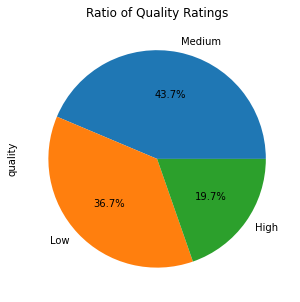

In [29]:
# Pie chart of ratio of new quality ratings.
y['quality'].value_counts().plot(kind='pie', autopct='%.1f%%', title='Ratio of Quality Ratings', figsize=(5,5))
plt.show()

In [30]:
# partition data (60/40 split)
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.30, random_state=1)

In [31]:
#minmax scaler
#fit the scale using the Training set
#transform both the training set and validation set

# Scaling the predictors
scaler = preprocessing.MinMaxScaler()
scaler.fit(train_X)

train_X=pd.DataFrame(scaler.transform(train_X), columns=train_X.columns)
valid_X=pd.DataFrame(scaler.transform(valid_X), columns=valid_X.columns)

# **Build Models**

## Setup

In [32]:
import tensorflow as tf 
from tensorflow import keras

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization

!pip install keras-tuner
import keras_tuner

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 5.5 MB/s 
     |████████████████████████████████| 1.6 MB 29.3 MB/s 


In [33]:
data = df_rem.values
X, y_qual = data[:, :11], data[:, -2]
X, y_qual = X.astype('float'), y_qual.astype('float')

y_type = pd.get_dummies(df_rem['Type'], drop_first=False)
y_type.rename(columns={'Red': 0, 'White': 1}, inplace=True)

n_feat = X.shape[1]
n_class_type = y_type.shape[1]

In [34]:
X_train, X_test, y_train_type, y_test_type, y_train_qual, y_test_qual = train_test_split(X, y_type, y_qual, 
                                                                                         test_size=0.3, 
                                                                                         random_state=42,
                                                                                         stratify=df_rem[['quality']])

In [35]:
class PrintDot(keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs):
        if epoch % 50 == 0: 
            print() 
        print('.', end='')

In [36]:
# evaluate accuracy for classification model
def conf_mat(model, test_val):
    # Running the model on the test sets to get the predictions
    preds = model.predict(X_test)

    # Get confusion matrix for classification model
    y_pred = preds.argmax(axis=1) # Converting the encoded target variables back to one column
    y_pred = pd.DataFrame(y_pred,columns=["progress"])
    print(y_pred['progress'].value_counts())

    # Comparing prediction with actual value to get confusion matrix
    y_test_cat = test_val.idxmax(axis=1)
    y_test_cat = pd.DataFrame(y_test_cat,columns=["progress"])

    print(metrics.confusion_matrix(y_test_cat,y_pred))
    print(metrics.classification_report(y_test_cat,y_pred))

In [37]:
# Plot model metrics
def plots(history, types):
    plt.figure(figsize=(10,10)) 
    for i, type in enumerate(types): 
        ax = plt.subplot(2,2,i+1) 
        ax.set_title(type.replace('_', ' ').title())
        plt.xlabel('Epoch') 
        plt.ylabel(' '.join(type.split('_')[1:]).title()) 
        plt.plot(history.epoch, 
                np.array(history.history[type]),
                label=f'Training')
        plt.plot(history.epoch, 
                np.array(history.history[f'val_{type}']),
                label = f'Validation')
        plt.legend()

## Base Model

In [ ]:
# Binning the data into 3 categories, 0 for Low, 1 for Medium, 2 for High
y_train_qual_cat = np.copy(y_train_qual)
y_train_qual_cat[y_train_qual_cat < 6] = 0
y_train_qual_cat[y_train_qual_cat == 6] = 1
y_train_qual_cat[y_train_qual_cat > 6] = 2

y_test_qual_cat = np.copy(y_test_qual)
y_test_qual_cat[y_test_qual_cat < 6] = 0
y_test_qual_cat[y_test_qual_cat == 6] = 1
y_test_qual_cat[y_test_qual_cat > 6] = 2

y_train_qual_cat = pd.get_dummies(y_train_qual_cat, drop_first=False)
y_test_qual_cat = pd.get_dummies(y_test_qual_cat, drop_first=False)

n_class_qual = y_train_qual_cat.shape[1]
print(n_class_qual, y_train_qual_cat.shape, y_test_qual_cat.shape)
y_test_qual_cat.head()

3 (4524, 3) (1939, 3)


,0.0,1.0,2.0
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0
4,0,1,0


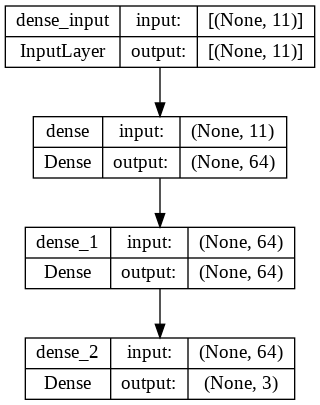

In [ ]:
b_model = keras.Sequential(
    [
        Dense(64, activation='relu', input_shape=(n_feat,)),
        Dense(64, activation='relu'),
        Dense(n_class_qual, activation='softmax'),
    ])

b_model.compile(loss='categorical_crossentropy', 
                optimizer=keras.optimizers.RMSprop(0.001),
                metrics='binary_accuracy')

keras.utils.plot_model(b_model, show_shapes=True)

In [ ]:
b_m_history = b_model.fit(x=X_train, 
                          y=y_train_qual_cat,
                          validation_data=(X_test, y_test_qual_cat),
                          epochs=50,
                          verbose=0,
                          callbacks=[PrintDot()])


..................................................

In [ ]:
b_m_history.history.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

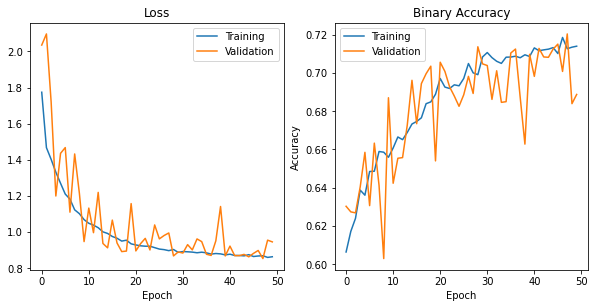

In [ ]:
plots(b_m_history, ['loss', 'binary_accuracy'])

In [ ]:
conf_mat(b_model, y_test_qual_cat)

61/61 [==============================] - 0s 2ms/step
1    1261
2     435
0     243
Name: progress, dtype: int64
[[185 503  21]
 [ 55 602 190]
 [  3 156 224]]
              precision    recall  f1-score   support

         0.0       0.76      0.26      0.39       709
         1.0       0.48      0.71      0.57       847
         2.0       0.51      0.58      0.55       383

    accuracy                           0.52      1939
   macro avg       0.58      0.52      0.50      1939
weighted avg       0.59      0.52      0.50      1939



## Alternate 1: Altered hyperparamters

In [ ]:
def build_model(hp):
    model = keras.Sequential()
    model.add(Input(shape=(n_feat,)))

    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(hp.Int(f'Units_{i+1}', 
                               min_value=16, 
                               max_value=64, 
                               step=16), 
                        activation=hp.Choice(f'Activation_{i+1}', 
                                             ['relu', 'tanh'])))
        
        if hp.Boolean(f'Dropout_{i+1}'):
            model.add(Dropout(0.25))

    model.add(Dense(n_class_qual, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer=hp.Choice('Optimizer', ['adam', 'rmsprop']),
                  metrics=['binary_accuracy'])
  
    return model

In [ ]:
tuner = keras_tuner.tuners.RandomSearch(build_model,
                                        objective='val_binary_accuracy',
                                        max_trials=50,
                                        executions_per_trial=2,
                                        overwrite=True)

tuner.search(X_train, y_train_qual_cat,
             epochs=20, 
             validation_data=(X_test, y_test_qual_cat),
             verbose=2)

Trial 50 Complete [00h 00m 27s]
val_binary_accuracy: 0.7163486778736115

Best val_binary_accuracy So Far: 0.7198728024959564
Total elapsed time: 00h 19m 17s


Results summary
Results in ./untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 2
Units_1: 64
Activation_1: tanh
Dropout_1: False
Optimizer: adam
Units_2: 48
Activation_2: relu
Dropout_2: False
Score: 0.7198728024959564
Trial summary
Hyperparameters:
num_layers: 3
Units_1: 48
Activation_1: tanh
Dropout_1: False
Optimizer: adam
Units_2: 48
Activation_2: tanh
Dropout_2: False
Units_3: 32
Activation_3: relu
Dropout_3: False
Score: 0.7163486778736115
Trial summary
Hyperparameters:
num_layers: 2
Units_1: 64
Activation_1: tanh
Dropout_1: False
Optimizer: adam
Units_2: 32
Activation_2: relu
Dropout_2: True
Units_3: 16
Activation_3: relu
Dropout_3: False
Score: 0.7138558924198151
Trial summary
Hyperparameters:
num_layers: 3
Units_1: 48
Activation_1: tanh
Dropout_1: False
Optimizer: rmsprop
Units_2: 32
Activation_2: relu
Dropout_2: False
Units_3: 32
Activation_3: tanh
Dropout_3: True
Score: 0.7131683230400085
Trial summary
Hyperparameters:
num_layers: 1
Units_1: 

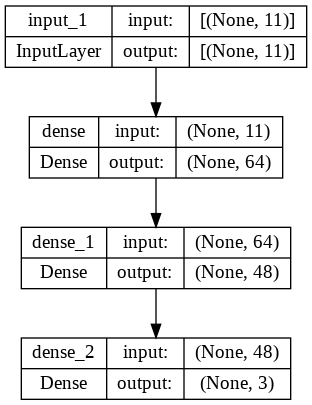

In [ ]:
tuner.results_summary()

best_model = tuner.get_best_models(num_models=1)[0]
keras.utils.plot_model(best_model, show_shapes=True)

## Alternate 2: Regression (Wine quality) vs. Base Model Classification (quality categories (low-high))

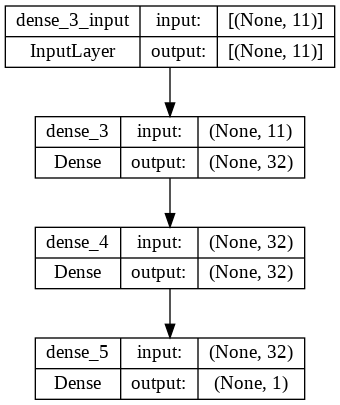

In [ ]:
# baseline model 
regr_model = keras.Sequential([ 
    keras.layers.Dense(32, activation=tf.nn.relu, #our first hidden layer! (Relu = 0 to inf)
                       # there are different types of layers, and Dense is the simplest layer
                       input_shape=(n_feat,)),
    keras.layers.Dense(32, activation=tf.nn.relu,), # 2nd hidden layer
    keras.layers.Dense(1) #output layer with 1 neuron for 1 output (compressive strength)

  ])
# Rule of Thumb for number of layers = average of input neuron + output neuron (2/3 of input +output))

regr_model.compile(loss='mse', #loss function that we use for training
                optimizer="rmsprop", # optimization algorithm (advanced SGD) (refer to keras.io)
                metrics=['mape']) #how to evaluate our model from a business perspective? (mean absolute error since we woule like to know absolute deviation)
keras.utils.plot_model(regr_model, show_shapes=True)

In [ ]:
EPOCHS = 300

regr_history = regr_model.fit(X_train, y_train_qual, 
                            epochs=EPOCHS,
                            validation_data=(X_test, y_test_qual),
                            verbose=0,
                            callbacks=[PrintDot()]) 


..................................................
..................................................
..................................................
..................................................
..................................................
..................................................

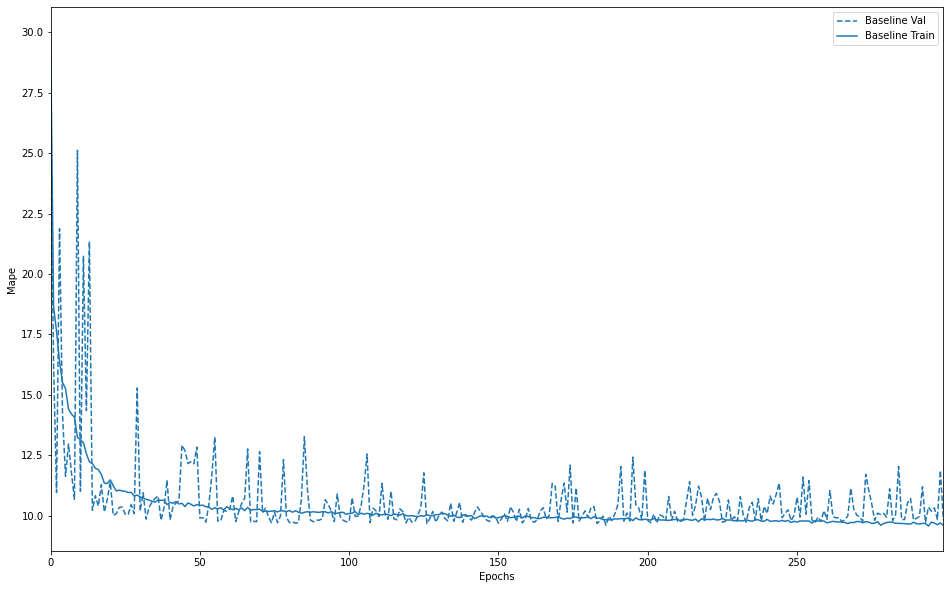

In [ ]:
import matplotlib.pyplot as plt


def plot_history(histories, key='mape'):
  plt.figure(figsize=(16,10))
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])

plot_history([('baseline', regr_history)])

<BarContainer object of 32 artists>

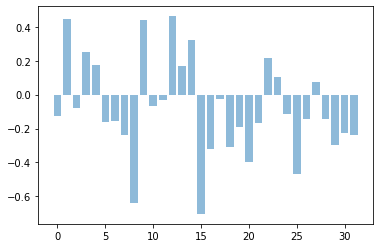

In [ ]:
# Plot Weights
nfw = regr_model.get_weights()[0][0]
y_pos = np.arange(len(nfw))
 
plt.bar(y_pos, nfw, align='center', alpha=0.5)

In [ ]:
l1_model = keras.Sequential([ #model with l1 regulization
    keras.layers.Dense(32, kernel_regularizer=keras.regularizers.l1(0.1), activation=tf.nn.relu,
                       input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, use_bias=True, kernel_regularizer=keras.regularizers.l1(0.01), activation=tf.nn.relu),
    keras.layers.Dense(32, use_bias=True, kernel_regularizer=keras.regularizers.l1(0.01), activation=tf.nn.relu),
    keras.layers.Dense(32, use_bias=True, kernel_regularizer=keras.regularizers.l1(0.01), activation=tf.nn.relu),
    keras.layers.Dense(1)
  ])

l1_model.compile(loss='mse',
                optimizer="rmsprop",
                metrics=['mape']) 

l2_model = keras.Sequential([ #model with l2 regulization
    keras.layers.Dense(10, kernel_regularizer=keras.regularizers.l2(0.1), activation=tf.nn.relu,
                       input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, kernel_regularizer=keras.regularizers.l2(0.1), activation=tf.nn.relu),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, kernel_regularizer=keras.regularizers.l2(0.1), activation=tf.nn.relu),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, kernel_regularizer=keras.regularizers.l2(0.1), activation=tf.nn.relu),
    keras.layers.Dense(1)
  ])

l2_model.compile(loss='mse',
                optimizer="rmsprop",
                metrics=['mape'])

In [ ]:
l1_history = l1_model.fit(X_train, y_train_qual, epochs=EPOCHS,
                    validation_data= (X_test, y_test_qual), verbose=0,
                    callbacks=[PrintDot()])
l2_history = l2_model.fit(X_train, y_train_qual, epochs=EPOCHS,
                    validation_data= (X_test, y_test_qual), verbose=0,
                    callbacks=[PrintDot()])


..................................................
..................................................
..................................................
..................................................
..................................................
..................................................
..................................................
..................................................
..................................................
..................................................
..................................................
..................................................

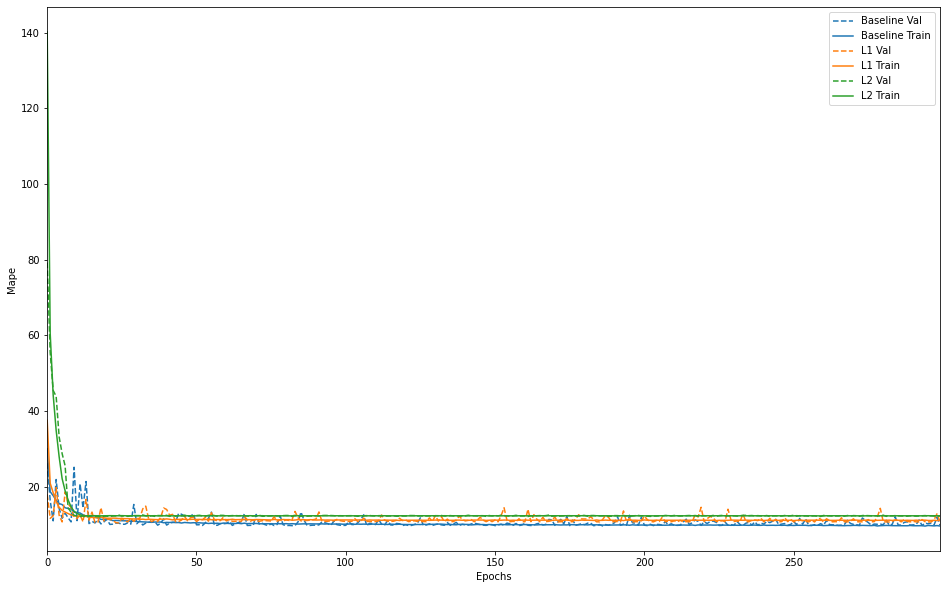

In [ ]:
# Plot history Multiple
plot_history([('baseline', regr_history),
              ('L1', l1_history),
              ('L2', l2_history)])

In [ ]:
print(min(regr_history.history['val_mape']), min(l1_history.history['val_mape']), min(l2_history.history['val_mape']))

9.608134269714355 10.397817611694336 11.89999771118164


## Alternate 3: Branching (Branching to regression and classification models)

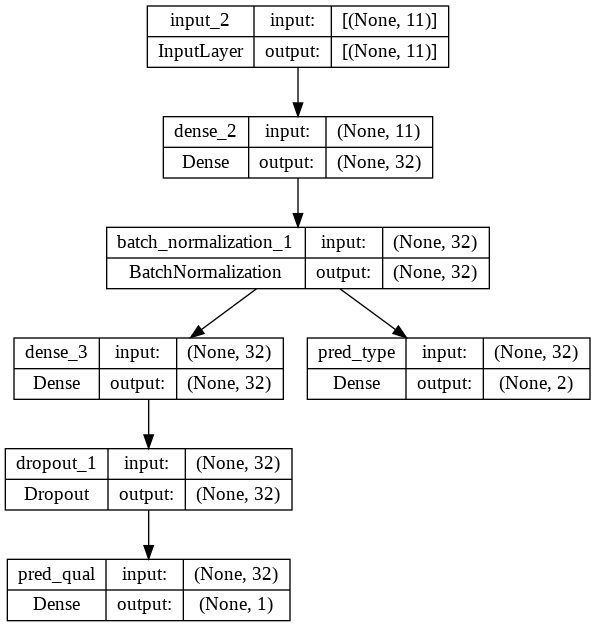

In [43]:
inputs = Input(shape=(n_feat,))
layer = Dense(32, activation='relu',)(inputs)
layer = BatchNormalization()(layer)

out_type = Dense(n_class_type, activation='sigmoid', name='pred_type')(layer)

out_qual = Dense(32, activation='relu',)(layer)
out_qual = Dropout(0.25)(out_qual)
out_qual = Dense(1, activation='linear', name='pred_qual')(out_qual)

branch_model = Model(inputs=inputs, outputs=[out_qual, out_type])
branch_model.compile(loss={'pred_qual': 'mse', 
                           'pred_type': 'binary_crossentropy'},
                     metrics={'pred_qual': 'mean_absolute_percentage_error',
                              'pred_type': 'binary_accuracy'}, 
                     optimizer='adam')

keras.utils.plot_model(branch_model, show_shapes=True)

In [44]:
branch_history = branch_model.fit(x=X_train, 
                                  y={'pred_type': y_train_type, 
                                     'pred_qual': y_train_qual}, 
                                  validation_data=(X_test, {'pred_type': y_test_type, 
                                                            'pred_qual': y_test_qual}),
                                  epochs=50, 
                                  verbose=0, 
                                  callbacks=[PrintDot()])


..................................................

In [45]:
# evaluate accuracy for classification model
def conf_mat_branch(model):
    # Running the model on the test sets to get the predictions
    qual_preds, type_preds = model.predict(X_test)

    # calculate error for regression model
    error = mean_absolute_percentage_error(y_test_qual, qual_preds)
    mae = mean_absolute_error(y_test_qual, qual_preds)
    print(f'MAPE: {error:.4%}\nMAE: {mae:.4f}\n')

    # Get confusion matrix for classification model
    y_pred = type_preds.argmax(axis=1) # Converting the encoded target variables back to one column
    y_pred = pd.DataFrame(y_pred,columns=["progress"])
    print(y_pred['progress'].value_counts())

    # Comparing prediction with actual value to get confusion matrix
    y_test_cat = y_test_type.idxmax(axis=1)
    y_test_cat = pd.DataFrame(y_test_cat,columns=["progress"])

    print(metrics.confusion_matrix(y_test_cat,y_pred))
    print(metrics.classification_report(y_test_cat,y_pred))

conf_mat_branch(branch_model)

61/61 [==============================] - 0s 3ms/step
MAPE: 9.9810%
MAE: 0.5585

0    1462
1     477
Name: progress, dtype: int64
[[1442    6]
 [  20  471]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1448
           1       0.99      0.96      0.97       491

    accuracy                           0.99      1939
   macro avg       0.99      0.98      0.98      1939
weighted avg       0.99      0.99      0.99      1939



In [ ]:
branch_history.history.keys()

dict_keys(['loss', 'pred_qual_loss', 'pred_type_loss', 'pred_qual_mean_absolute_percentage_error', 'pred_type_binary_accuracy', 'val_loss', 'val_pred_qual_loss', 'val_pred_type_loss', 'val_pred_qual_mean_absolute_percentage_error', 'val_pred_type_binary_accuracy'])

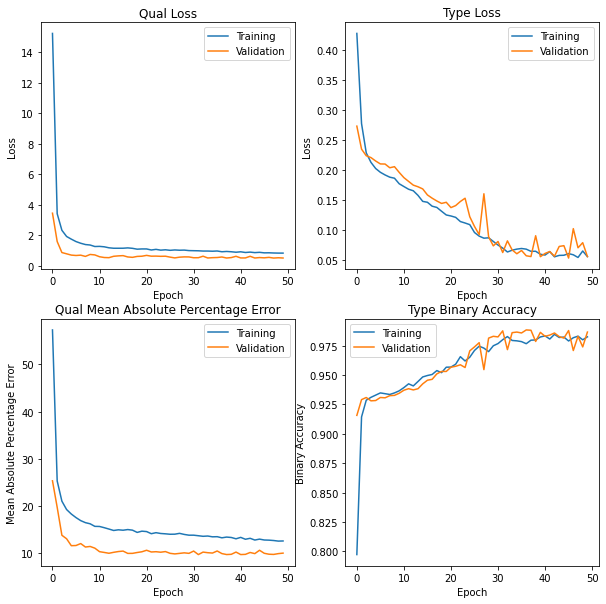

In [46]:
# Plot model metrics
def plots_branch(history, types):
    plt.figure(figsize=(10,10)) 
    for i, type in enumerate(types): 
        ax = plt.subplot(2,2,i+1) 
        ax.set_title(type[5:].replace('_', ' ').title())
        plt.xlabel('Epoch') 
        plt.ylabel(' '.join(type.split('_')[2:]).title()) 
        plt.plot(history.epoch, 
                np.array(history.history[type]),
                label=f'Training')
        plt.plot(history.epoch, 
                np.array(history.history[f'val_{type}']),
                label = f'Validation')
        plt.legend()

types=['pred_qual_loss', 'pred_type_loss', 'pred_qual_mean_absolute_percentage_error', 'pred_type_binary_accuracy']

plots_branch(branch_history, types)

# Implementation

In [ ]:
def predict(comp=None):
    # comp == composition of the wine, list with 11 values
    # Enter nothing when calling the function to input each value manually.
    # Show the range for each entry if entering manually with dict below.
    values = {'fixed acidity': (3.7, 15.9), 'volatile acidity': (0.07, 1.6), 
              'citric acid': (0, 1.7), 'residual sugar': (0.6, 65.9), 
              'chlorides': (0, 0.7), 'free sulfur dioxide': (1, 290), 
              'total sulfur dioxide': (5.9, 440), 'density': (0.9, 1.04), 
              'pH': (2.7, 4), 'sulphates': (0.2, 2), 'alcohol': (8, 15)}
    
    if type(comp) not in (list, tuple, np.ndarray):
        if comp == None:
            comp = list()
            for value in values:
                # Check if user input is in the range of accepted values.
                while True:
                    num = float(input(f'{value} (Min: {values[value][0]} - Max: {values[value][1]}): '))
                    if values[value][0] <= num <= values[value][1]: 
                        break
                    else:
                        print('Invalid entry. Try Again.')

                # Append the value to the composition list.
                comp.append(num)

    print(comp)
    # Change list to numpy array if its not already one:
    if type(comp) != np.ndarray:
        comp = np.array([comp]).astype('float')
    # Reshape numpy array if it needs to be done:
    elif len(comp.shape) == 1:
        comp = comp.reshape(1,11)
    
    # Predict with the model.
    pred = branch_model.predict(comp)

    qual = pred[0].item()
    wine_type = 'White' if pred[1][0].tolist().index(max(pred[1][0])) else 'Red'

    print(f'Quality: {qual}', f'Type: {wine_type}', sep='\n')

In [ ]:
predict()

fixed acidity (Min: 3.7 - Max: 15.9): 5
volatile acidity (Min: 0.07 - Max: 1.6): 1
citric acid (Min: 0 - Max: 1.7): 1
residual sugar (Min: 0.6 - Max: 65.9): 1
chlorides (Min: 0 - Max: 0.7): .5
free sulfur dioxide (Min: 1 - Max: 290): 100
total sulfur dioxide (Min: 5.9 - Max: 440): 300
density (Min: 0.9 - Max: 1.04): 1
pH (Min: 2.7 - Max: 4): 3
sulphates (Min: 0.2 - Max: 2): 1
alcohol (Min: 8 - Max: 15): 12
[5.0, 1.0, 1.0, 1.0, 0.5, 100.0, 300.0, 1.0, 3.0, 1.0, 12.0]
1/1 [==============================] - 0s 17ms/step
Quality: 3.8099546432495117
Type: Red


In [ ]:
predict([5.0, 1.0, 1.0, 1.0, 0.5, 100.0, 300.0, 1.0, 3.0, 1.0, 12.0])

[5.0, 1.0, 1.0, 1.0, 0.5, 100.0, 300.0, 1.0, 3.0, 1.0, 12.0]
1/1 [==============================] - 0s 17ms/step
Quality: 3.8099546432495117
Type: Red


In [ ]:
idx = 100 # Index to check
predict(X_test[idx])
# [1, 0] == "Red" for y_test_type
print(y_test_qual[idx], y_test_type.iloc[idx].values)

[6.499350e+00 3.499650e-01 3.100160e-01 1.020051e+01 6.899700e-02
 5.800290e+01 1.699915e+02 9.968200e-01 3.180159e+00 4.899510e-01
 9.400940e+00]
1/1 [==============================] - 0s 31ms/step
Quality: 5.1851725578308105
Type: Red
5.0 [1 0]
